In [1]:
#importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading data from csv
df= pd.read_csv("Retail_Transactions_Dataset.csv")
df. head()

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000000000,2022-01-21 06:27:29,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,NaN
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,2024-03-21 15:37:04,Lisa Graves,['Spinach'],6,41.49,Credit Card,Houston,Department Store,True,Professional,Winter,NaN
3,1000000003,2020-10-31 09:59:47,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,Mobile Payment,Chicago,Pharmacy,True,Homemaker,Spring,NaN
4,1000000004,2020-12-10 00:59:59,Susan Mitchell,['Dish Soap'],10,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items


In [39]:
# Converting Date column
df["Date"] = pd.to_datetime(df["Date"])


In [40]:
# Extracting required time features
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["DayOfWeek"] = df["Date"].dt.day_name()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   Transaction_ID     1000000 non-null  int64         
 1   Date               1000000 non-null  datetime64[ns]
 2   Customer_Name      1000000 non-null  object        
 3   Product            1000000 non-null  object        
 4   Total_Items        1000000 non-null  int64         
 5   Total_Cost         1000000 non-null  float64       
 6   Payment_Method     1000000 non-null  object        
 7   City               1000000 non-null  object        
 8   Store_Type         1000000 non-null  object        
 9   Discount_Applied   1000000 non-null  bool          
 10  Customer_Category  1000000 non-null  object        
 11  Season             1000000 non-null  object        
 12  Promotion          666057 non-null   object        
 13  Year               1000000 n

In [5]:
#cleaning data by droping duplicates
df = df.drop_duplicates()


In [6]:
# Total transactions
Total_Transactions=df['Transaction_ID'].count()
print(Total_Transactions)

74241


In [7]:
# Unique customers
Unique_Customers = df['Customer_Name'].nunique()
print(Unique_Customers)

55863


In [8]:
# Top 5 most common products
Top_Products = df['Product'].value_counts().head(5)
print(Top_Products)

Product
['Toothpaste']    377
['Beef']          215
['Tuna']          212
['Trash Cans']    207
['Dishware']      206
Name: count, dtype: int64


In [9]:
# Cities with highest number of transactions
Highest_Transaction_Cities = df['City'].value_counts()
print(Highest_Transaction_Cities)

City
Boston           7529
Seattle          7489
Chicago          7469
Atlanta          7467
Houston          7449
Los Angeles      7426
San Francisco    7402
Dallas           7392
Miami            7314
New York         7303
Name: count, dtype: int64


In [10]:
# Average spend per customer category
Top_Customer_categories_avg= df.groupby('Customer_Category')['Total_Cost'].mean()
print(Top_Customer_categories_avg)

Customer_Category
Homemaker         52.278725
Middle-Aged       52.403432
Professional      52.890599
Retiree           52.396849
Senior Citizen    52.066229
Student           52.378284
Teenager          52.280303
Young Adult       52.217522
Name: Total_Cost, dtype: float64


In [11]:
# Payment method preference by customer category
Preferred_Payment_Methods = df.groupby('Customer_Category')['Payment_Method'].value_counts()
print(Preferred_Payment_Methods)

Customer_Category  Payment_Method
Homemaker          Credit Card       2368
                   Debit Card        2336
                   Cash              2334
                   Mobile Payment    2300
Middle-Aged        Debit Card        2298
                   Mobile Payment    2263
                   Credit Card       2249
                   Cash              2247
Professional       Cash              2391
                   Mobile Payment    2334
                   Credit Card       2327
                   Debit Card        2276
Retiree            Mobile Payment    2392
                   Credit Card       2370
                   Cash              2287
                   Debit Card        2259
Senior Citizen     Credit Card       2414
                   Debit Card        2314
                   Mobile Payment    2313
                   Cash              2304
Student            Credit Card       2337
                   Cash              2332
                   Debit Card        2277


In [12]:
# Top payment method preference by customer category
Preferred_Payment_Methods2 = Preferred_Payment_Methods.groupby(level=0).head(1)
print(Preferred_Payment_Methods2)

Customer_Category  Payment_Method
Homemaker          Credit Card       2368
Middle-Aged        Debit Card        2298
Professional       Cash              2391
Retiree            Mobile Payment    2392
Senior Citizen     Credit Card       2414
Student            Credit Card       2337
Teenager           Debit Card        2373
Young Adult        Debit Card        2373
Name: count, dtype: int64


In [13]:
# Average number of items by store type
Avg_Total_Items = df.groupby("Store_Type")["Total_Items"].mean()
print(Avg_Total_Items)


Store_Type
Convenience Store    5.532259
Department Store     5.502390
Pharmacy             5.551106
Specialty Store      5.525467
Supermarket          5.495949
Warehouse Club       5.432284
Name: Total_Items, dtype: float64


In [14]:
# Cost of transactions where a discount was applied vs not applied
Avg_cost = df.groupby("Discount_Applied")["Total_Cost"].mean()
print(Avg_cost)


Discount_Applied
False    52.368393
True     52.359118
Name: Total_Cost, dtype: float64


In [16]:
# Average number of items purchased for different promotion types
Avg_items = df.groupby("Promotion")["Total_Items"].mean()
print(Avg_items)



Promotion
BOGO (Buy One Get One)        5.489001
Discount on Selected Items    5.521594
Name: Total_Items, dtype: float64


In [19]:
# Promotion with the highest total revenue
Best_promo = df.groupby("Promotion")["Total_Cost"].sum().sort_values(ascending=False)
print(Best_promo)

Promotion
Discount on Selected Items    1301243.72
BOGO (Buy One Get One)        1291005.20
Name: Total_Cost, dtype: float64


In [20]:
# Promotion that was most effective in terms of increasing total cost
promo_effectiveness = df.groupby("Promotion")["Total_Cost"].mean()
print(promo_effectiveness)


Promotion
BOGO (Buy One Get One)        52.299178
Discount on Selected Items    52.277679
Name: Total_Cost, dtype: float64


In [21]:
# season with the highest total revenue
Best_Season = df.groupby("Season")["Total_Cost"].sum().sort_values(ascending=False)
print(Best_Season)

Season
Spring    976445.18
Winter    972393.92
Summer    970245.74
Fall      968400.35
Name: Total_Cost, dtype: float64


Store_Type         Season
Convenience Store  Fall      2181716.31
                   Spring    2187726.46
                   Summer    2187752.91
                   Winter    2174705.68
Department Store   Fall      2182956.07
                   Spring    2176207.25
                   Summer    2186415.12
                   Winter    2185977.13
Pharmacy           Fall      2197176.21
                   Spring    2195684.07
                   Summer    2180616.00
                   Winter    2193202.73
Specialty Store    Fall      2173242.47
                   Spring    2172885.60
                   Summer    2177291.97
                   Winter    2178180.18
Supermarket        Fall      2183625.58
                   Spring    2191152.99
                   Summer    2211214.19
                   Winter    2177462.45
Warehouse Club     Fall      2218197.07
                   Spring    2189582.38
                   Summer    2173385.60
                   Winter    2178863.98
Name: Total_Co

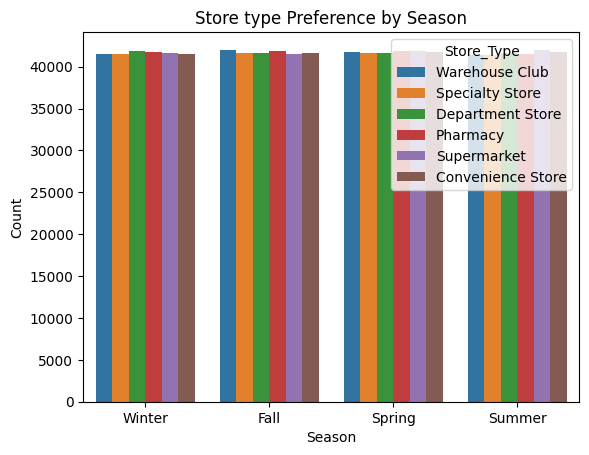

In [46]:
# seasonal preferences for certain store types
store_type_season = df.groupby(["Store_Type", "Season"])["Total_Cost"].sum()
print(store_type_season)
store_type_season2 = df.groupby(["Season"])['Store_Type'].value_counts()
print(store_type_season2)

sns.countplot(data=df, x="Season", hue="Store_Type")
plt.xlabel("Season")
plt.ylabel("Count")
plt.title("Store type Preference by Season")
plt.show()

In [11]:
# seasonal preferences for certain store types & customer categories
seasonal_preference = df.groupby(["Season", "Customer_Category","Store_Type"]).size()
print(seasonal_preference)


Season  Customer_Category  Store_Type       
Fall    Homemaker          Convenience Store    5234
                           Department Store     5202
                           Pharmacy             5249
                           Specialty Store      5280
                           Supermarket          5228
                                                ... 
Winter  Young Adult        Department Store     5169
                           Pharmacy             5093
                           Specialty Store      5198
                           Supermarket          5215
                           Warehouse Club       5214
Length: 192, dtype: int64


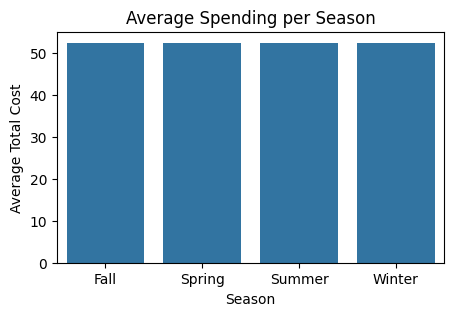

In [34]:
# plot showing average spending per season
avg_spend_season = df.groupby("Season")["Total_Cost"].mean()
plt.figure(figsize=(5, 3))
sns.barplot(x=avg_spend_season.index, y=avg_spend_season)
plt.title('Average Spending per Season')
plt.xlabel('Season')
plt.ylabel('Average Total Cost')
plt.show()

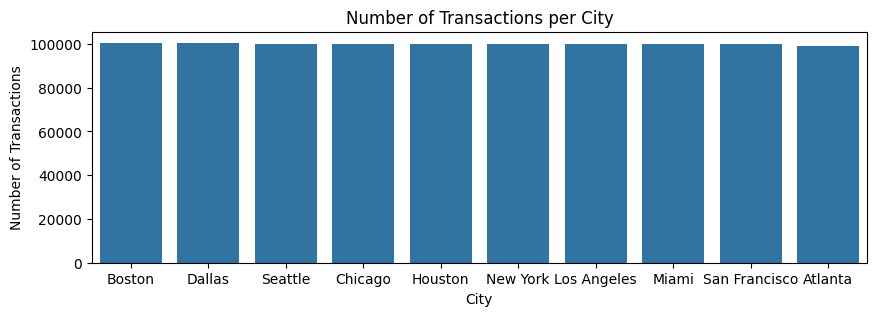

In [36]:
# Bar plot of number of transactions per city
transactions_per_city = df['City'].value_counts()
plt.figure(figsize=(10, 3))
sns.barplot(x=transactions_per_city.index, y=transactions_per_city)
plt.title('Number of Transactions per City')
plt.xlabel('City')
plt.ylabel('Number of Transactions')
plt.show()

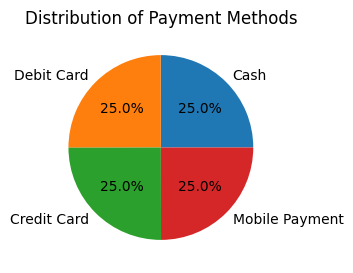

In [37]:
# Pie chart showing distribution of payment methods
payment_method_counts = df['Payment_Method'].value_counts()
plt.figure(figsize=(5, 3))
plt.pie(payment_method_counts, labels=payment_method_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Payment Methods')
plt.show()

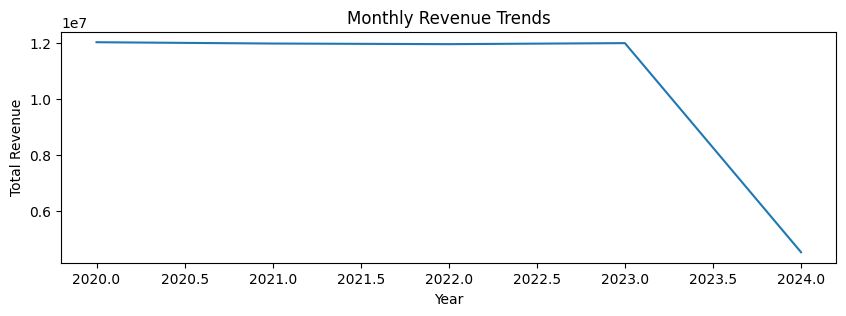

In [42]:
# Line chart of monthly revenue trends
monthly_revenue = df.groupby(['Year'])['Total_Cost'].sum()
plt.figure(figsize=(10, 3))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue)
plt.title('Monthly Revenue Trends')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()


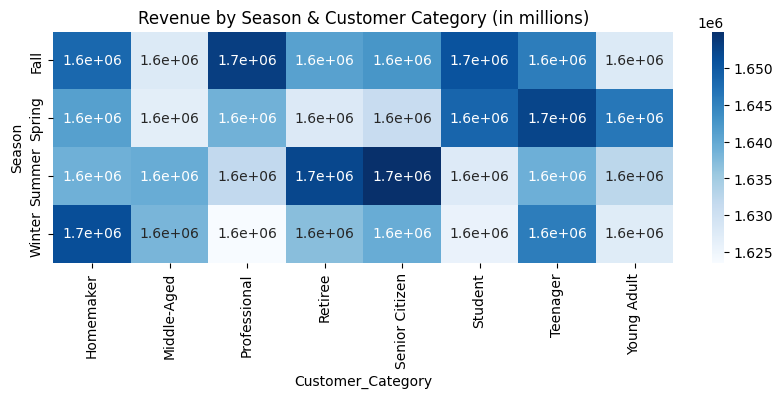

In [66]:
# Heatmap showing revenue by season and customer category
revenue_by_season = df.groupby(['Season', 'Customer_Category'])['Total_Cost'].sum().unstack()
plt.figure(figsize=(10, 3))
sns.heatmap(revenue_by_season, annot=True, cmap="Blues")
plt.title("Revenue by Season & Customer Category (in millions)")
plt.show()
